In [1]:
! pip install pycaret xgboost lightgbm catboost shap

  Using cached graphviz-0.21-py3-none-any.whl.metadata (12 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 39.6 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.8/27.8 MB 51.7 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 558.7/558.7 kB 23.9 MB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached graphviz-0.21-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [catboost]4/5 [catboost]


In [2]:
# Cell 1 — Load Medical Insurance Cost data & sanity checks

import pandas as pd
import numpy as np

# -----------------------------
# Load Insurance Dataset
# -----------------------------
url = "https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv"
df = pd.read_csv(url)

print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nTarget column: 'charges' (medical insurance cost)")

# -----------------------------
# Basic info
# -----------------------------
print("\nDataset Info:")
print(df.info())

print("\nFirst few rows:")
display(df.head())

# -----------------------------
# Target statistics
# -----------------------------
print("\nTarget (charges) summary:")
display(df["charges"].describe(percentiles=[0.01, 0.05, 0.5, 0.95, 0.99]).to_frame().T)

# -----------------------------
# Check for missing values
# -----------------------------
print("\nMissing values per column:")
print(df.isnull().sum())

# -----------------------------
# Check categorical columns
# -----------------------------
print("\nCategorical column distributions:")
for col in ['sex', 'smoker', 'region']:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Next cell: PyCaret setup()

Dataset shape: (1338, 7)

Columns: ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Target column: 'charges' (medical insurance cost)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB
None

First few rows:


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520



Target (charges) summary:


,count,mean,std,min,1%,5%,50%,95%,99%,max
charges,1338.0,13270.422265,12110.011237,1121.8739,1252.97273,1757.7534,9382.033,41181.827787,48537.480726,63770.42801



Missing values per column:
age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Categorical column distributions:

sex:
sex
male      676
female    662
Name: count, dtype: int64

smoker:
smoker
no     1064
yes     274
Name: count, dtype: int64

region:
region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


In [4]:
# Cell 2 — PyCaret setup (Regression)

from pycaret.regression import *

TARGET = "charges"

# Reproducible folds via session_id. Imputation kept simple & fast.
s = setup(
    data=df,
    target=TARGET,
    train_size=0.8,
    session_id=123,
    normalize=True,
    transformation=True,  # Keep this - transforms features only
    # Removed transform_target=True - this was causing the BracketError
    fold=5,
    verbose=False
)

print("\n✅ PyCaret setup complete.")

# (Optional) Peek at available estimators so we only 'include' installed ones later
avail = models()  # table of available models in this environment
display(avail)


✅ PyCaret setup complete.


,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [5]:
# Cell 3 — Compare candidate models (environment-aware)

from pycaret.regression import models, compare_models, pull

# Build an include list based on what's actually installed/available
avail_df = models()
try:
    avail_ids = set(avail_df.index.astype(str))
except Exception:
    # Fallback if the API changes
    avail_ids = set(avail_df["ID"].astype(str))

candidates = [
    # Linear family
    "lr", "ridge", "lasso", "en", "huber", "omp", "br", "lar", "llar", "par", "ransac",
    # KNN
    "knn",
    # Trees & ensembles
    "dt", "rf", "et", "gbr",
    # Boosters (optional deps)
    "lightgbm", "xgboost", "catboost",
]

include = [m for m in candidates if m in avail_ids]
skipped = [m for m in candidates if m not in avail_ids]

print("Included models:", include)
if skipped:
    print("Skipped (not available in this environment):", skipped)

# Compare using MAE (more robust to outliers than RMSE)
best = compare_models(include=include or None, sort="MAE")
print("\n✅ Model comparison complete. Best model object:")
print(best)

# Show the leaderboard table
display(pull())



Included models: ['lr', 'ridge', 'lasso', 'en', 'huber', 'omp', 'br', 'lar', 'llar', 'par', 'ransac', 'knn', 'dt', 'rf', 'et', 'gbr', 'lightgbm', 'xgboost', 'catboost']


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2717.5102,23259530.5972,4817.0898,0.8377,0.4523,0.3216,0.0200
et,Extra Trees Regressor,2905.3470,30100519.8642,5482.6466,0.7900,0.5002,0.3431,0.0300
catboost,CatBoost Regressor,2916.7950,25930660.8694,5086.9823,0.8189,0.4901,0.3458,0.1660
rf,Random Forest Regressor,2936.3650,26536371.1518,5145.1678,0.8145,0.4877,0.3568,0.0360
lightgbm,Light Gradient Boosting Machine,3100.9208,26357588.6648,5125.5002,0.8156,0.5559,0.3822,0.6240
xgboost,Extreme Gradient Boosting,3315.7389,30506416.0000,5512.9346,0.7871,0.5700,0.4231,0.0240
dt,Decision Tree Regressor,3664.9229,54241450.7837,7351.9220,0.6217,0.6089,0.4808,0.2680
huber,Huber Regressor,3670.3396,48300262.1638,6944.8932,0.6653,0.5816,0.2533,0.2780
par,Passive Aggressive Regressor,3680.2964,48437086.5519,6952.5480,0.6646,0.5477,0.2499,0.0140
knn,K Neighbors Regressor,3690.7938,35211070.0000,5926.8096,0.7552,0.5119,0.3957,0.0140



✅ Model comparison complete. Best model object:
GradientBoostingRegressor(random_state=123)


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2717.5102,2.325953e+07,4817.0898,0.8377,0.4523,0.3216,0.020
et,Extra Trees Regressor,2905.3470,3.010052e+07,5482.6466,0.7900,0.5002,0.3431,0.030
catboost,CatBoost Regressor,2916.7950,2.593066e+07,5086.9823,0.8189,0.4901,0.3458,0.166
rf,Random Forest Regressor,2936.3650,2.653637e+07,5145.1678,0.8145,0.4877,0.3568,0.036
lightgbm,Light Gradient Boosting Machine,3100.9208,2.635759e+07,5125.5002,0.8156,0.5559,0.3822,0.624
xgboost,Extreme Gradient Boosting,3315.7389,3.050642e+07,5512.9346,0.7871,0.5700,0.4231,0.024
dt,Decision Tree Regressor,3664.9229,5.424145e+07,7351.9220,0.6217,0.6089,0.4808,0.268
huber,Huber Regressor,3670.3396,4.830026e+07,6944.8932,0.6653,0.5816,0.2533,0.278
par,Passive Aggressive Regressor,3680.2964,4.843709e+07,6952.5480,0.6646,0.5477,0.2499,0.014
knn,K Neighbors Regressor,3690.7938,3.521107e+07,5926.8096,0.7552,0.5119,0.3957,0.014


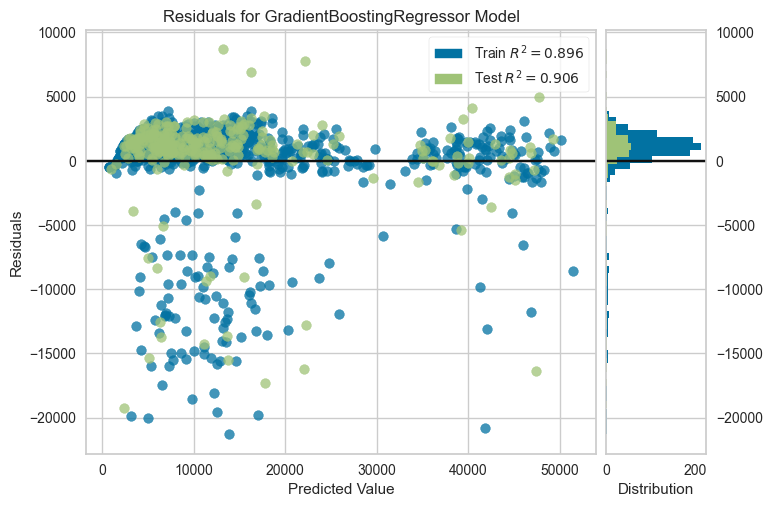

✅ Residuals plot done.


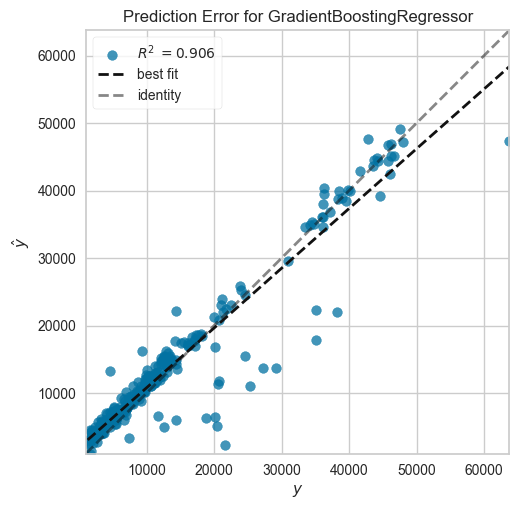

✅ Error plot done.


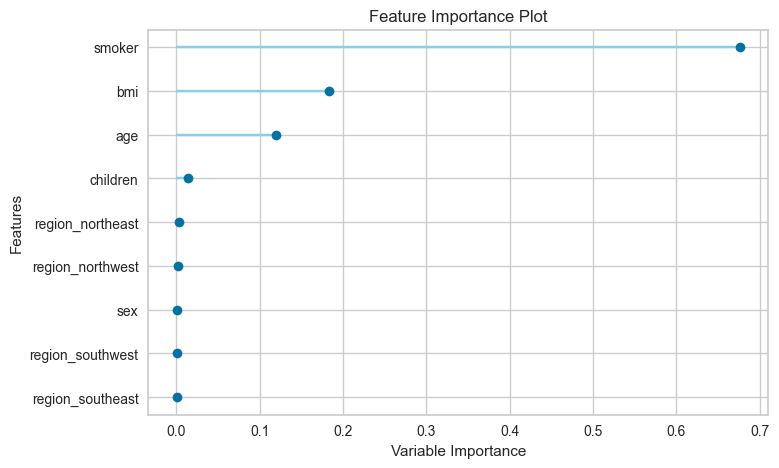

✅ Feature importance plot done.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.7494,14435323.5312,3799.3846,0.9056,0.3689,0.2727



Holdout evaluation snapshot:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.7494,1.443532e+07,3799.3846,0.9056,0.3689,0.2727


In [6]:
# Cell 4 — Baseline model diagnostics & plots

from pycaret.regression import plot_model, predict_model, pull

# 1) Residuals plot
try:
    plot_model(best, plot="residuals")
    print("✅ Residuals plot done.")
except Exception as e:
    print("Residuals plot not available for this estimator:", e)

# 2) Error plot (Prediction Error)
try:
    plot_model(best, plot="error")
    print("✅ Error plot done.")
except Exception as e:
    print("Error plot not available for this estimator:", e)

# 3) Feature importance (may not be supported for some models)
try:
    plot_model(best, plot="feature")
    print("✅ Feature importance plot done.")
except Exception as e:
    print("Feature importance not available for this estimator:", e)

# 4) Holdout predictions & metrics snapshot
_ = predict_model(best)   # evaluates on holdout/validation set inside PyCaret
leaderboard_snapshot = pull()  # pull last displayed table (predictions summary/metrics)
print("\nHoldout evaluation snapshot:")
display(leaderboard_snapshot.head(10))


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2882.0981,23913115.7303,4890.1039,0.8267,0.7657,0.3357
1,3160.2158,28505522.4137,5339.0563,0.7865,0.5332,0.4162
2,3203.0219,26723855.9201,5169.5122,0.8039,0.5240,0.3841
3,2903.1099,23429051.9654,4840.3566,0.8536,0.4661,0.3576
4,2708.1482,22505930.9739,4744.0416,0.8553,0.4712,0.3480
Mean,2971.3188,25015495.4007,4996.6141,0.8252,0.5520,0.3683
Std,185.0621,2241818.0809,222.1324,0.0271,0.1102,0.0288


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).

✅ Tuning complete. Tuned model object:
GradientBoostingRegressor(random_state=123)


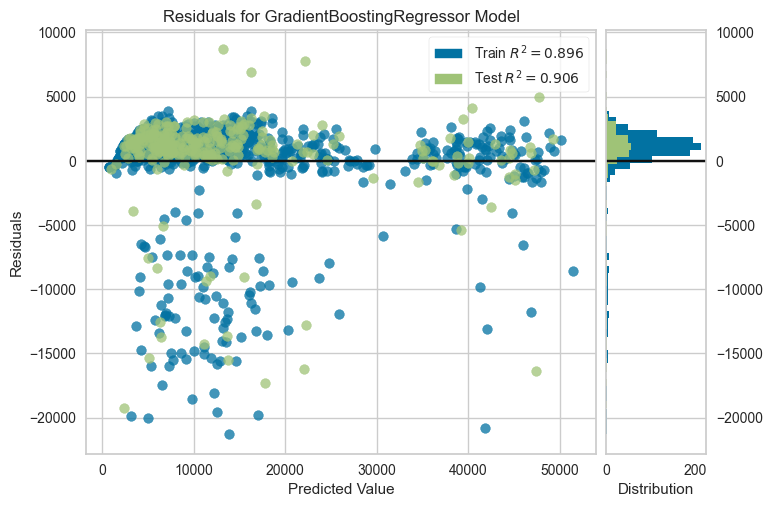

✅ Residuals plot (tuned) done.


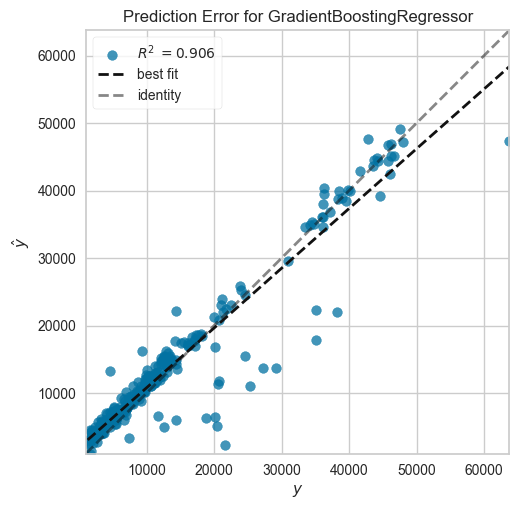

✅ Error plot (tuned) done.


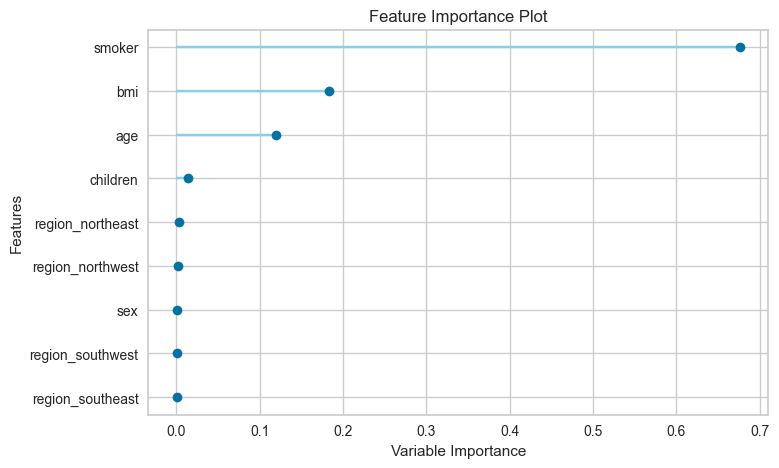

✅ Feature importance (tuned) done.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.7494,14435323.5312,3799.3846,0.9056,0.3689,0.2727



Holdout evaluation (tuned) snapshot:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.7494,1.443532e+07,3799.3846,0.9056,0.3689,0.2727


In [7]:
# Cell 5 — Hyperparameter tuning of best model

from pycaret.regression import tune_model, plot_model, predict_model, pull

# Tune the selected 'best' model from compare_models()
# Optimize for MAE (mirrors the earlier choice)
tuned_best = tune_model(best, optimize="MAE", choose_better=True, n_iter=50)

print("\n✅ Tuning complete. Tuned model object:")
print(tuned_best)

# 1) Residuals for tuned model
try:
    plot_model(tuned_best, plot="residuals")
    print("✅ Residuals plot (tuned) done.")
except Exception as e:
    print("Residuals plot not available for tuned estimator:", e)

# 2) Error (Prediction Error) plot
try:
    plot_model(tuned_best, plot="error")
    print("✅ Error plot (tuned) done.")
except Exception as e:
    print("Error plot not available for tuned estimator:", e)

# 3) Feature importance (if supported)
try:
    plot_model(tuned_best, plot="feature")
    print("✅ Feature importance (tuned) done.")
except Exception as e:
    print("Feature importance not available for tuned estimator:", e)

# Evaluate tuned model on holdout
_ = predict_model(tuned_best)
tuned_snapshot = pull()
print("\nHoldout evaluation (tuned) snapshot:")
display(tuned_snapshot.head(10))


In [8]:
# Cell 6 — Ensembling, Blending, and Stacking

from pycaret.regression import (
    compare_models, ensemble_model, blend_models, stack_models,
    predict_model, pull, create_model
)

# Re-select a small cohort of strong base models for ensembles
top_models = compare_models(n_select=5, sort="MAE")
print("\nTop models selected for ensembles:")
for i, m in enumerate(top_models, 1):
    print(f"{i}. {m}")

# 1) Bagging (on the tuned best model if possible; else on top_models[0])
bag_base = locals().get("tuned_best", None) or top_models[0]
try:
    bagged = ensemble_model(bag_base, method="Bagging")
    print("\n✅ Bagging created.")
    _ = predict_model(bagged)
    bagged_metrics = pull()
    print("Bagged model holdout metrics:")
    display(bagged_metrics.head(10))
except Exception as e:
    print("Bagging not available for this estimator:", e)
    bagged = None

# 2) Boosting (on the tuned best model if possible; else on top_models[0])
# Note: This uses PyCaret's generic boosting wrapper, not LightGBM/XGB directly.
try:
    boosted = ensemble_model(bag_base, method="Boosting")
    print("\n✅ Boosting created.")
    _ = predict_model(boosted)
    boosted_metrics = pull()
    print("Boosted model holdout metrics:")
    display(boosted_metrics.head(10))
except Exception as e:
    print("Boosting not available for this estimator:", e)
    boosted = None

# 3) Blending (soft voting / weighted average of predictions)
# Use up to 3–4 of the top models for a compact blend
blend_candidates = top_models[:4]
try:
    blender = blend_models(estimator_list=blend_candidates, optimize="MAE")
    print("\n✅ Blended model created.")
    _ = predict_model(blender)
    blend_metrics = pull()
    print("Blended model holdout metrics:")
    display(blend_metrics.head(10))
except Exception as e:
    print("Blending failed:", e)
    blender = None

# 4) Stacking (meta-learner on top of base models)
# Choose a simple, well-behaved meta-learner (ridge) if available; else default
try:
    try:
        meta_learner = create_model("ridge")
    except Exception:
        meta_learner = None

    stacker = stack_models(
        estimator_list=top_models,
        meta_model=meta_learner,
        optimize="MAE",
        fold=5,
        restack=True
    )
    print("\n✅ Stacked model created.")
    _ = predict_model(stacker)
    stack_metrics = pull()
    print("Stacked model holdout metrics:")
    display(stack_metrics.head(10))
except Exception as e:
    print("Stacking failed:", e)
    stacker = None

# 5) Pick the current overall best among tuned/ensembled variants based on MAE
candidates = []
names = []

if "tuned_best" in globals() and tuned_best is not None:
    _ = predict_model(tuned_best)
    candidates.append(pull().assign(Model="tuned_best").head(1))
if bagged is not None:
    _ = predict_model(bagged)
    candidates.append(pull().assign(Model="bagged").head(1))
if boosted is not None:
    _ = predict_model(boosted)
    candidates.append(pull().assign(Model="boosted").head(1))
if blender is not None:
    _ = predict_model(blender)
    candidates.append(pull().assign(Model="blender").head(1))
if stacker is not None:
    _ = predict_model(stacker)
    candidates.append(pull().assign(Model="stacker").head(1))

if candidates:
    import pandas as pd
    summary = pd.concat(candidates, ignore_index=True)
    # Try to locate MAE column robustly
    mae_col = next((c for c in summary.columns if c.upper() == "MAE"), None)
    if mae_col:
        summary_sorted = summary.sort_values(by=mae_col, ascending=True)
    else:
        # Fallback to RMSLE/RMSE if MAE is absent
        alt = next((c for c in summary.columns if c.upper() in ("RMSE", "RMSLE", "MAPE")), None)
        summary_sorted = summary.sort_values(by=alt, ascending=True) if alt else summary

    print("\n🔎 Comparison of tuned/ensembled variants (lower is better):")
    display(summary_sorted)

    # Keep a handle to the current champion
    champion_name = summary_sorted.iloc[0].get("Model", "tuned_best")
    champion = {
        "tuned_best": locals().get("tuned_best"),
        "bagged": bagged,
        "boosted": boosted,
        "blender": locals().get("blender"),
        "stacker": locals().get("stacker")
    }.get(champion_name, locals().get("tuned_best"))

    print(f"\n🏆 Current champion selected: {champion_name}")
else:
    champion = locals().get("tuned_best", None)
    print("\nNo ensemble/blend/stack metrics available; falling back to tuned_best as champion.")


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,2717.5102,23259530.5972,4817.0898,0.8377,0.4523,0.3216,0.0240
et,Extra Trees Regressor,2905.3470,30100519.8642,5482.6466,0.7900,0.5002,0.3431,0.0300
catboost,CatBoost Regressor,2916.7950,25930660.8694,5086.9823,0.8189,0.4901,0.3458,0.1440
rf,Random Forest Regressor,2936.3650,26536371.1518,5145.1678,0.8145,0.4877,0.3568,0.0340
lightgbm,Light Gradient Boosting Machine,3100.9208,26357588.6648,5125.5002,0.8156,0.5559,0.3822,0.6440
xgboost,Extreme Gradient Boosting,3315.7389,30506416.0000,5512.9346,0.7871,0.5700,0.4231,0.0200
dt,Decision Tree Regressor,3664.9229,54241450.7837,7351.9220,0.6217,0.6089,0.4808,0.0140
huber,Huber Regressor,3670.3396,48300262.1638,6944.8932,0.6653,0.5816,0.2533,0.0140
par,Passive Aggressive Regressor,3680.2964,48437086.5519,6952.5480,0.6646,0.5477,0.2499,0.0140
knn,K Neighbors Regressor,3690.7938,35211070.0000,5926.8096,0.7552,0.5119,0.3957,0.0140



Top models selected for ensembles:
1. GradientBoostingRegressor(random_state=123)
2. ExtraTreesRegressor(n_jobs=-1, random_state=123)
3. <catboost.core.CatBoostRegressor object at 0x175adf6d0>
4. RandomForestRegressor(n_jobs=-1, random_state=123)
5. LGBMRegressor(n_jobs=-1, random_state=123)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2565.7865,21415539.6765,4627.6927,0.8448,0.4224,0.2916
1,2740.9325,24648243.1558,4964.6997,0.8154,0.4546,0.3252
2,2971.7896,25392645.2070,5039.1115,0.8136,0.4891,0.3440
3,2426.1220,19676542.5305,4435.8249,0.8771,0.3993,0.2750
4,2611.4448,22497175.1561,4743.1187,0.8554,0.4529,0.3340
Mean,2663.2151,22726029.1452,4762.0895,0.8413,0.4437,0.3140
Std,184.1976,2091644.0105,220.3012,0.0242,0.0306,0.0263



✅ Bagging created.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2153.0207,14057778.6147,3749.3704,0.9081,0.3655,0.2692


Bagged model holdout metrics:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2153.0207,1.405778e+07,3749.3704,0.9081,0.3655,0.2692


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,3801.2331,27029004.6236,5198.9426,0.8041,0.5493,0.5405
1,4482.5479,32726814.6488,5720.7355,0.7549,0.6701,0.7927
2,4709.8435,35377429.5492,5947.8929,0.7403,0.6501,0.7278
3,4007.1098,28432124.6368,5332.1782,0.8224,0.5861,0.6429
4,4048.6940,30333300.5072,5507.5676,0.8050,0.6200,0.6705
Mean,4209.8857,30779734.7931,5541.4634,0.7854,0.6151,0.6749
Std,334.1857,2990266.5720,268.1765,0.0318,0.0435,0.0846



✅ Boosting created.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3843.3617,23395065.0257,4836.8445,0.8470,0.5827,0.6492


Boosted model holdout metrics:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3843.3617,2.339507e+07,4836.8445,0.847,0.5827,0.6492


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2676.8580,22920506.7838,4787.5366,0.8339,0.4596,0.3220
1,2867.4818,27032582.2299,5199.2867,0.7975,0.5023,0.3644
2,3130.0536,27359979.0404,5230.6767,0.7992,0.5027,0.3453
3,2640.6352,21797412.7768,4668.7699,0.8638,0.4218,0.3077
4,2635.7607,23814159.2649,4879.9753,0.8469,0.4552,0.3282
Mean,2790.1579,24584928.0192,4953.2491,0.8283,0.4683,0.3335
Std,190.0213,2228297.2447,224.1690,0.0262,0.0308,0.0196



✅ Blended model created.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2299.5408,15881886.1543,3985.2084,0.8961,0.3976,0.2980


Blended model holdout metrics:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2299.5408,1.588189e+07,3985.2084,0.8961,0.3976,0.298


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4441.7121,37672415.2673,6137.7859,0.7270,0.5038,0.4672
1,4305.5728,38544877.0348,6208.4521,0.7113,0.6971,0.4789
2,4229.8044,37777693.6867,6146.3561,0.7227,0.7513,0.4363
3,4258.3301,38613795.8733,6214.0000,0.7588,0.5814,0.4125
4,4604.7840,40533744.3149,6366.6117,0.7394,0.6582,0.4881
Mean,4368.0407,38628505.2354,6214.6411,0.7319,0.6384,0.4566
Std,138.9408,1027145.0053,82.1016,0.0162,0.0871,0.0281


,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,2675.9299,21382249.9905,4624.0945,0.8451,0.4447,0.3222
1,2858.9165,26239404.3874,5122.4413,0.8035,0.5809,0.3421
2,3026.8348,25824742.0621,5081.8050,0.8105,0.5305,0.3236
3,2399.9219,20185839.9062,4492.8654,0.8739,0.4572,0.2658
4,2724.3688,23327833.5662,4829.8896,0.8500,0.4616,0.3291
Mean,2737.1944,23392013.9825,4830.2192,0.8366,0.4950,0.3165
Std,208.0281,2381118.2526,246.9754,0.0262,0.0524,0.0263



✅ Stacked model created.


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2196.5801,14225874.5856,3771.7204,0.9070,0.3667,0.2619


Stacked model holdout metrics:


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2196.5801,1.422587e+07,3771.7204,0.907,0.3667,0.2619


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2193.7494,14435323.5312,3799.3846,0.9056,0.3689,0.2727


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,2153.0207,14057778.6147,3749.3704,0.9081,0.3655,0.2692


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3843.3617,23395065.0257,4836.8445,0.8470,0.5827,0.6492


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,2299.5408,15881886.1543,3985.2084,0.8961,0.3976,0.2980


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Stacking Regressor,2196.5801,14225874.5856,3771.7204,0.9070,0.3667,0.2619



🔎 Comparison of tuned/ensembled variants (lower is better):


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
1,bagged,2153.0207,1.405778e+07,3749.3704,0.9081,0.3655,0.2692
0,tuned_best,2193.7494,1.443532e+07,3799.3846,0.9056,0.3689,0.2727
4,stacker,2196.5801,1.422587e+07,3771.7204,0.9070,0.3667,0.2619
3,blender,2299.5408,1.588189e+07,3985.2084,0.8961,0.3976,0.2980
2,boosted,3843.3617,2.339507e+07,4836.8445,0.8470,0.5827,0.6492



🏆 Current champion selected: bagged


In [9]:
# Cell 7 — Model interpretability (SHAP)

from pycaret.regression import interpret_model

# Pick a model to explain: champion → tuned_best → best
model_to_explain = locals().get("champion") or locals().get("tuned_best") or locals().get("best")
assert model_to_explain is not None, "No model available to interpret. Run previous cells first."

print("Explaining model:", type(model_to_explain).__name__)

# 1) Global explanation — SHAP summary plot (requires `shap` and supported estimator)
try:
    interpret_model(model_to_explain, plot="summary")
    print("✅ SHAP summary plotted.")
except Exception as e:
    print("SHAP summary not available for this estimator/environment:", e)

# 2) Global relationships — SHAP correlation (feature interaction overview)
try:
    interpret_model(model_to_explain, plot="correlation")
    print("✅ SHAP correlation plotted.")
except Exception as e:
    print("SHAP correlation not available:", e)

# 3) Local explanation — why one specific prediction looks the way it does
# Use the first row of the transformed training data (index=0) for a 'reason' plot
try:
    interpret_model(model_to_explain, plot="reason", observation=0)
    print("✅ Local 'reason' plot for observation=0.")
except Exception as e:
    print("Local reason plot not available:", e)

# Notes:
# - If you get import errors, make sure `pip install shap` (already recommended).
# - Some linear/GLM models have limited SHAP support; tree-based boosters usually work best.


Explaining model: BaggingRegressor
SHAP summary not available for this estimator/environment: This function only supports tree based models for binary classification: catboost, rf, xgboost, lightgbm, dt, et.
SHAP correlation not available: This function only supports tree based models for binary classification: catboost, rf, xgboost, lightgbm, dt, et.
Local reason plot not available: This function only supports tree based models for binary classification: catboost, rf, xgboost, lightgbm, dt, et.


In [11]:
# Cell 8 — Finalize model & show predictions on validation data

from pycaret.regression import finalize_model, predict_model, get_config
import pandas as pd

# Choose the best available model handle
model = locals().get("champion") or locals().get("tuned_best") or locals().get("best")
assert model is not None, "No trained model found. Please run previous cells."

print("Finalizing model on full training data… (locks preprocessing + refits on all rows)")
final_model = finalize_model(model)
print("✅ Model finalized:", type(final_model).__name__)

# Get validation data to show predictions
X_test = get_config('X_test')
y_test = get_config('y_test')

# Create a sample dataframe for predictions
validation_sample = X_test.head(10).copy()
validation_sample[TARGET] = y_test.head(10).values

print("\nMaking predictions on validation sample…")
sample_preds = predict_model(final_model, data=validation_sample)

print("✅ Predictions on validation sample:")
display(sample_preds[[TARGET, 'prediction_label']].head(10))

# Show prediction accuracy
print("\nPrediction vs Actual comparison:")
comparison = pd.DataFrame({
    'Actual': sample_preds[TARGET],
    'Predicted': sample_preds['prediction_label'],
    'Error': sample_preds[TARGET] - sample_preds['prediction_label'],
    'Error_%': ((sample_preds[TARGET] - sample_preds['prediction_label']) / sample_preds[TARGET] * 100).round(2)
})
display(comparison)

# Next cell: persist the trained pipeline (save_model / load_model)

Finalizing model on full training data… (locks preprocessing + refits on all rows)
✅ Model finalized: Pipeline

Making predictions on validation sample…


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,1181.3842,1811501.9658,1345.9205,0.9773,0.2279,0.2120


✅ Predictions on validation sample:


,charges,prediction_label
650,9800.888672,10209.430803
319,4667.607422,6671.634310
314,34838.871094,35580.170557
150,5125.215820,6262.457862
336,12142.578125,14698.142037
970,10702.642578,11450.232163
169,4827.904785,6172.958046
684,4766.021973,5236.566207
1097,1674.632324,2677.617503
512,9361.327148,10762.322633



Prediction vs Actual comparison:


,Actual,Predicted,Error,Error_%
650,9800.888672,10209.430803,-408.542131,-4.17
319,4667.607422,6671.634310,-2004.026888,-42.93
314,34838.871094,35580.170557,-741.299463,-2.13
150,5125.215820,6262.457862,-1137.242042,-22.19
336,12142.578125,14698.142037,-2555.563912,-21.05
970,10702.642578,11450.232163,-747.589585,-6.99
169,4827.904785,6172.958046,-1345.053261,-27.86
684,4766.021973,5236.566207,-470.544234,-9.87
1097,1674.632324,2677.617503,-1002.985179,-59.89
512,9361.327148,10762.322633,-1400.995484,-14.97


In [13]:
# Cell 9 — Persist pipeline (save/load) & quick sanity prediction

from pycaret.regression import save_model, load_model, predict_model, get_config
import pandas as pd
import sys

SAVE_NAME = "insurance_cost_model"

# 1) Save the finalized pipeline (includes preprocessing + trained estimator)
save_path = save_model(final_model, SAVE_NAME)
print(f"✅ Saved pipeline to base name: {save_path}")

# 2) Load it back (simulates a fresh session)
loaded_model = load_model(SAVE_NAME)
print("✅ Reloaded pipeline:", type(loaded_model).__name__)

# 3) Sanity check inference on a small sample from the original dataset
sample = df.head(5).copy()
sample_preds = predict_model(loaded_model, data=sample)

print("\nSanity predictions on sample data:")
display(sample_preds[[TARGET, "prediction_label"]])

# 4) (Optional) Write a separate quick file for inspection
sample_preds[[TARGET, "prediction_label"]].rename(columns={"prediction_label": "predicted_charges"}).to_csv(
    "sample_inference_preview.csv", index=False
)
print("📝 Wrote sample_inference_preview.csv")

# 5) Environment note
print("\nEnvironment:")
print("Python:", sys.version.split()[0])
try:
    import pycaret
    print("PyCaret:", pycaret.__version__)
except Exception:
    pass

# 🎉 End of core workflow: setup → compare → create/tune → ensemble/blend/stack → interpret → finalize → predict → save/load

Transformation Pipeline and Model Successfully Saved
✅ Saved pipeline to base name: (Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['age', 'bmi', 'children'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['sex', 'smoker', 'region'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('ordinal_encoding',
                 TransformerWrapper(include=['sex', 'smoker'],
                                    transfor...
                                    transformer=OneHotEncoder(cols=['region'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('transformation',
                 TransformerWrapper(transformer=PowerTran

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,3822.4241,41922991.6481,6474.7966,0.3603,0.5817,0.4344



Sanity predictions on sample data:


,charges,prediction_label
0,16884.923828,18078.644527
1,1725.552246,3462.389828
2,4449.461914,6334.259489
3,21984.470703,7785.479090
4,3866.855225,3964.628487


📝 Wrote sample_inference_preview.csv

Environment:
Python: 3.11.14
PyCaret: 3.3.2


In [14]:
# Cell 10 — (Optional) Interactive dashboard & config introspection

# 1) Try launching PyCaret's dashboard (may not be available in all environments)
#    This can open a new tab or inline app depending on the setup.
try:
    from pycaret.regression import dashboard

    model_for_dash = locals().get("champion") or locals().get("tuned_best") or locals().get("best")
    assert model_for_dash is not None, "No model available for dashboard."

    # Launch the dashboard (blocks while running in some environments).
    # Stop with Kernel Interrupt when done exploring.
    dashboard(model_for_dash)
except Exception as e:
    print("ℹ️ Dashboard not available or failed to start:", e)

# 2) Inspect key setup artifacts (useful for debugging / learning)
try:
    from pycaret.regression import get_config

    print("\n--- PyCaret config snapshot ---")
    X_train = get_config("X_train")
    X_test = get_config("X_test")
    y_train = get_config("y_train")
    y_test = get_config("y_test")
    prep_pipe = get_config("prep_pipe")
    pipeline = get_config("pipeline")

    print("X_train shape:", X_train.shape)
    print("X_test  shape:", X_test.shape)
    print("y_train length:", len(y_train))
    print("y_test  length:", len(y_test))

    print("\nPreprocessing pipeline steps:")
    try:
        for step_name, step_obj in prep_pipe.steps:
            print(" -", step_name, "=>", type(step_obj).__name__)
    except Exception:
        print(prep_pipe)

    print("\nFull pipeline (prep + model) tail:")
    try:
        for step_name, step_obj in pipeline.steps[-3:]:
            print(" -", step_name, "=>", type(step_obj).__name__)
    except Exception:
        print(pipeline)
except Exception as e:
    print("Could not retrieve config artifacts:", e)

# 3) (Optional) Export transformed matrices for external analysis
try:
    import pandas as pd
    Xy_train = X_train.copy()
    Xy_train[TARGET] = y_train.values
    Xy_test = X_test.copy()
    Xy_test[TARGET] = y_test.values

    Xy_train.to_csv("train_transformed.csv", index=False)
    Xy_test.to_csv("validation_transformed.csv", index=False)
    print("\n📝 Wrote 'train_transformed.csv' and 'validation_transformed.csv'")
except Exception as e:
    print("Skipping transformed export:", e)


ℹ️ Dashboard not available or failed to start: 
'explainerdashboard' is a soft dependency and not included in the pycaret installation. Please run: `pip install explainerdashboard` to install.
Alternately, you can install this by running `pip install pycaret[analysis]`

--- PyCaret config snapshot ---
Could not retrieve config artifacts: Variable 'prep_pipe' not found. Possible variables are: ['gpu_param', 'USI', 'fold_shuffle_param', 'test_transformed', 'variables', 'test', 'y_train', 'y_test', 'X_test', 'dataset', 'fold_groups_param', 'train', 'target_param', 'dataset_transformed', 'train_transformed', 'variable_and_property_keys', 'idx', 'memory', 'gpu_n_jobs_param', 'logging_param', 'X_test_transformed', 'exp_name_log', 'data', 'y', 'fold_generator', 'pipeline', 'y_train_transformed', '_ml_usecase', 'seed', 'y_transformed', 'X_train', '_available_plots', 'n_jobs_param', 'X_transformed', 'html_param', 'transform_target_param', 'log_plots_param', 'is_multiclass', 'X_train_transformed